In [1]:
import pandas as pd 

In [24]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.92,5.06,19
1,827,Seema,Singh,919085484267,0.22,2.83,20
2,566,Pooja,Rao,919692747629,4.00,5.78,20
3,431,Vikram,Trivedi,919289900918,3.93,NaN,20
4,688,Rishi,Nair,918510327681,0.34,3.35,22


In [4]:
df.shape

(50, 7)

In [5]:
df.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            5
CGPA2            3
age              0
dtype: int64

In [6]:
df.describe()

,Roll Number,Mobile Number,CGPA1,CGPA2,age
count,50.000000,5.000000e+01,45.000000,47.000000,50.000000
mean,492.440000,9.185083e+11,5.092444,4.586170,22.780000
std,250.705792,9.131771e+08,3.068496,2.688698,22.994489
min,15.000000,9.170212e+11,0.000000,0.250000,2.000000
25%,288.000000,9.176502e+11,2.920000,2.730000,18.000000
50%,527.500000,9.186161e+11,4.750000,4.080000,19.500000
75%,659.000000,9.192426e+11,8.110000,6.580000,22.750000
max,994.000000,9.199546e+11,9.920000,9.720000,180.000000


In [25]:
df["CGPA1"].fillna(df["CGPA1"].mean(),inplace = True)

In [26]:
df["CGPA2"].fillna(df["CGPA2"].mean(),inplace = True)

In [9]:
df.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            0
CGPA2            0
age              0
dtype: int64

In [13]:
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)

IQR = Q3 - Q1

In [14]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [15]:
print(Q1,Q3,IQR,lower_limit,upper_limit)

18.0 22.75 4.75 10.875 29.875


In [27]:
df[(df['age'] < lower_limit) | (df['age'] > upper_limit)]

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
6,532,Vaishnavi,Jha,919009969408,5.63,4.38,2
27,722,Vaishnavi,Patel,917550452611,9.49,3.29,180


In [44]:
df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)]

In [45]:
df[(df['age'] < lower_limit) | (df['age'] > upper_limit)]

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age


D:\SK\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

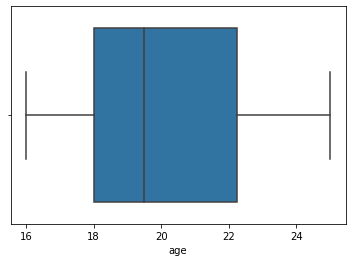

In [47]:
import seaborn as sns
sns.boxplot(df['age'])

In [50]:
import numpy as np
df['age'] = df['age'].apply(lambda x: np.log(x) if x > 0 else 0)

print(df['age'])

0     2.944439
1     2.995732
2     2.995732
3     2.995732
4     3.091042
5     2.944439
7     3.135494
8     2.890372
9     3.178054
10    2.833213
11    2.772589
12    2.944439
13    3.091042
14    3.135494
15    3.044522
16    2.772589
17    3.218876
18    2.772589
19    3.178054
20    2.944439
21    2.890372
22    2.890372
23    3.135494
24    3.091042
25    3.135494
26    2.995732
28    3.178054
29    2.772589
30    3.135494
31    3.178054
32    3.135494
33    2.890372
34    2.772589
35    2.890372
36    2.772589
37    3.091042
38    3.091042
39    2.944439
40    3.135494
41    2.944439
42    3.091042
43    2.772589
44    2.833213
45    3.091042
46    2.944439
47    2.772589
48    2.772589
49    2.944439
Name: age, dtype: float64


D:\SK\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

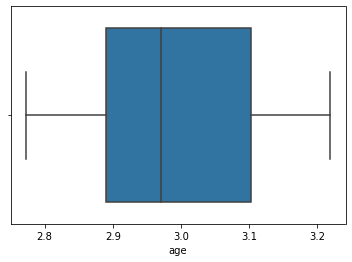

In [51]:
sns.boxplot(df['age'])

In [52]:
from scipy import stats

# Calculate z-score for each numerical column
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Define threshold for outlier detection
threshold = 3

# Find and remove rows with outliers based on z-score
df_no_outliers = df[(abs(z_scores) < threshold).all(axis=1)]


In [53]:
df_no_outliers

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.920000,5.06000,2.944439
1,827,Seema,Singh,919085484267,0.220000,2.83000,2.995732
2,566,Pooja,Rao,919692747629,4.000000,5.78000,2.995732
3,431,Vikram,Trivedi,919289900918,3.930000,4.58617,2.995732
4,688,Rishi,Nair,918510327681,0.340000,3.35000,3.091042
5,401,Pooja,Bose,918752969300,8.740000,7.23000,2.944439
7,774,Vaishnavi,Verma,917407265215,8.350000,2.51000,3.135494
8,942,Nikita,Mehta,917631350107,0.660000,0.50000,2.890372
9,660,Divya,Devi,919595059601,5.092444,9.66000,3.178054
10,32,Vaishnavi,Pandey,918922269173,4.020000,4.08000,2.833213
